# **part2**

## **import libraries and define constant**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [ ]:
LEARNING_RATE = 0.01

## **load file**

In [ ]:
df = pd.read_csv("/content/cars.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sales in Thousands      100 non-null    float64
 1   Year Resale Value       100 non-null    float64
 2   Price in Thousands      100 non-null    float64
 3   Engine Size             100 non-null    float64
 4   Horsepower              100 non-null    int64  
 5   Wheelbase               100 non-null    float64
 6   Width                   100 non-null    float64
 7   Length                  100 non-null    float64
 8   Curb Weight             100 non-null    float64
 9   Fuel Capacity           100 non-null    float64
 10  Fuel Efficiency         100 non-null    int64  
 11  Power Perf Factor       100 non-null    float64
 12  Vehicle Type Car        100 non-null    int64  
 13  Vehicle Type Passenger  100 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 11.1

In [ ]:
df

,Sales in Thousands,Year Resale Value,Price in Thousands,Engine Size,Horsepower,Wheelbase,Width,Length,Curb Weight,Fuel Capacity,Fuel Efficiency,Power Perf Factor,Vehicle Type Car,Vehicle Type Passenger
0,16.919,16.360,21.500,1.8,140,101.2,67.3,172.4,2.639,13.2,28,58.280150,0,1
1,39.384,19.875,28.400,3.2,225,108.1,70.3,192.9,3.517,17.2,25,91.370778,0,1
2,20.397,22.255,23.990,1.8,150,102.6,68.2,178.0,2.998,16.4,27,62.777639,0,1
3,18.780,23.555,33.950,2.8,200,108.7,76.1,192.0,3.561,18.5,22,84.565105,0,1
4,91.561,12.475,21.975,3.1,175,109.0,72.7,194.6,3.368,17.5,25,71.181451,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,9.761,11.425,14.900,2.0,115,98.9,68.3,163.3,2.767,14.5,26,46.943877,0,1
96,83.721,13.240,16.700,2.0,115,98.9,68.3,172.3,2.853,14.5,26,47.638237,0,1
97,51.102,16.725,21.200,1.8,150,106.4,68.5,184.1,3.043,16.4,27,61.701381,0,1
98,9.569,16.575,19.990,2.0,115,97.4,66.7,160.4,3.079,13.7,26,48.907372,0,1


## **main part**

### **split data to train , test and validation**

In [ ]:
def split_train_test_val(df,test_lengh_rate,features_name,target_name):
  train , test = train_test_split(df, test_size = test_lengh_rate, random_state=42)
  train,val = train_test_split(train,test_size=0.15,random_state=42)
  train_X = train[features_name]
  train_Y = train[target_name]
  test_X = test[features_name]
  test_Y = test[target_name]
  val_X = val[features_name]
  val_Y = val[target_name]
  return train_X, train_Y,test_X,test_Y,val_X,val_Y

###**standardize features**

In [ ]:
def standardize_df(X,Y):
  Y=np.array((Y-Y.mean())/Y.std())
  X=X.apply(lambda rec:(rec-rec.mean())/rec.std(),axis=0)
  return X,Y

### **define algorithm**

gradient descent has some steps
1. In first we don`t have any weights and bias so that we have to init them randomly
2. We want to calcute predict values with wieghts and bias
$$\hat{y} = bias + w_1*f(x_1) + w_2*f(x_2) + ... +w_n*f(x_n)$$
3. Then we need to calcute loss function.I prefer tho choose MSE
$$MSE = \frac{1}{n}\Sigma{(\hat{y}-y)^2}$$
$$MSE = \frac{1}{n}\Sigma{(bias + w_1*f(x_1i) + w_2*f(x_2i) + ... +w_n*f(x_ni)-y)^2}$$
4. Now we calcute gradient.
$$\frac{\partial MSE}{\partial bias} = \frac{2}{n}\Sigma{(bias + w_1*f(x_1i) + w_2*f(x_2i) + ... +w_n*f(x_ni)-y)}$$
$$\frac{\partial MSE}{\partial w_1} = \frac{2}{n}\Sigma{f(x_1i)(bias + w_1*f(x_1i) + w_2*f(x_2i) + ... +w_n*f(x_ni)-y)}$$
$$\frac{\partial MSE}{\partial w_2} = \frac{2}{n}\Sigma{f(x_2i)(bias + w_1*f(x_1i) + w_2*f(x_2i) + ... +w_n*f(x_ni)-y)}$$
$$.$$
$$.$$
$$.$$
$$\frac{\partial MSE}{\partial w_n} = \frac{2}{n}\Sigma{f(x_ni)(bias + w_1*f(x_1i) + w_2*f(x_2i) + ... +w_n*f(x_ni)-y)}$$
5. Then we update  parameters
$$current Bias = prevBias - \alpha*\frac{\partial MSE}{\partial bias}$$
$$w_1current = w_1prev - \alpha*\frac{\partial MSE}{\partial w_1}$$
$$w_2current = w_2prev - \alpha*\frac{\partial MSE}{\partial w_2}$$
$$.$$
$$.$$
$$.$$
$$w_ncurrent = w_nprev - \alpha*\frac{\partial MSE}{\partial w_n}$$

### **step 1**

In [ ]:
def init_bias_and_weight(number_dims):
  bias =random.random()
  weight=np.random.rand(number_dims)
  return bias , weight

### **step 3**

In [ ]:
def cal_loss_function(true,pred):
  SE = (true - pred)**2
  MSE = np.sum(SE)/len(SE)
  return MSE

In [ ]:
def get_r2_score(predicted_values, actual_values):
  SSres = (predicted_values - actual_values)**2
  SStot = (actual_values - np.mean(actual_values))**2
  return 1 - np.sum(SSres)/np.sum(SStot)

### **step 4**

In [ ]:
def cal_gradian(true,pred,X):
  return 2 * np.dot(X.T,pred-true) / len(X)

In [ ]:
def cal_bias_gradian(true,pred):
  return 2*np.sum(pred-true)/len(true)

### **step 5**

In [ ]:
def update_weight_and_bias(learn_rate,gradian,bias_gradian,prev_weight,prev_bias):
  return prev_weight - learn_rate*gradian , prev_bias - learn_rate*bias_gradian

In [ ]:
def run_gradian_desent_algorithm(df,features_name,target_name,n_iter):
  X_train,Y_train,X_test,Y_test,X_val,Y_val = split_train_test_val(df,0.2,features_name,target_name)
  X_train , Y_train = standardize_df(X_train,Y_train)
  X_test,Y_test = standardize_df(X_test,Y_test)
  X_val,Y_val = standardize_df(X_val,Y_val)
  #step 1
  init_bias , init_weight = init_bias_and_weight(len(X_train.columns))
  iter_list = []
  val_r2_score = []
  train_r2_score = []
  for i in range(n_iter):
    iter_list.append(i+1)
    #step 2
    predict_train = np.dot(X_train,init_weight) + init_bias
    predict_val = np.dot(X_val,init_weight) + init_bias
    #step 3
    train_r2_score.append(get_r2_score(Y_train, predict_train))
    val_r2_score.append(get_r2_score(Y_val, predict_val))
    #step 4
    gradian = cal_gradian(Y_train,predict_train,X_train)
    bias_gradian = cal_bias_gradian(Y_train,predict_train)
    #step 5
    init_weight , init_bias = update_weight_and_bias(LEARNING_RATE,gradian,bias_gradian,init_weight,init_bias)
  return init_weight,init_bias,iter_list,val_r2_score, train_r2_score,X_test,Y_test

##**plot learning curve for train and validation**

In [ ]:
features = list(df.columns)
features.remove('Price in Thousands')
features.remove('Horsepower')
last_w , last_bias ,iter_list,val_r2,train_r2 ,X_test,Y_test= run_gradian_desent_algorithm(df,features,'Price in Thousands',300)

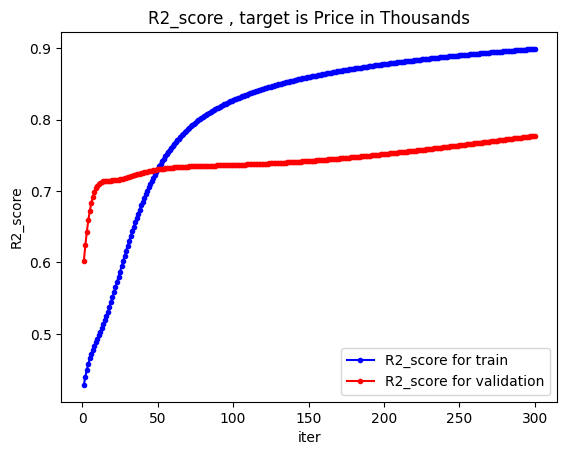

In [ ]:
plt.plot(iter_list, train_r2, color='blue', marker='.', linestyle='-', label='R2_score for train')
plt.plot(iter_list, val_r2, color='red', marker='.', linestyle='-', label='R2_score for validation')
plt.xlabel("iter")
plt.ylabel('R2_score')
plt.title("R2_score , target is Price in Thousands")
plt.legend()
plt.show()

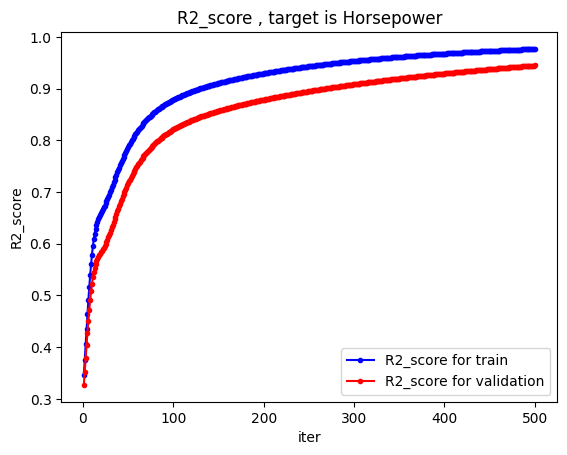

In [ ]:
last_w , last_bias ,iter_list,val_r2,train_r2  ,X_test,Y_test= run_gradian_desent_algorithm(df,features,'Horsepower',500)
plt.plot(iter_list, train_r2, color='blue', marker='.', linestyle='-', label='R2_score for train')
plt.plot(iter_list, val_r2, color='red', marker='.', linestyle='-', label='R2_score for validation')
plt.xlabel("iter")
plt.ylabel('R2_score')
plt.title("R2_score , target is Horsepower")
plt.legend()
plt.show()

**note** : As you can see, the accuracy of the model data and validation is increasing for a while, like the training data, but from one point on, when the accuracy of the training data increases, the accuracy of the validation does not increase, which indicates overfitting.

##**plot the accuracy of model with diffrent random state and calcute accuracy for test**

###**for Price in Thousands**

0.9301765317768339


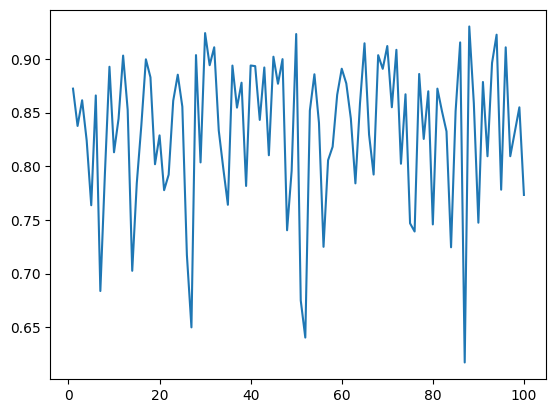

In [ ]:
time = []
accuracy = []
max_r2 = -1

for i in range(100):
  time.append(i+1)
  n_iter = random.randint(100,500)
  last_w , last_bias ,iter_list,val_r2,train_r2 ,X_test,Y_test= run_gradian_desent_algorithm(df,features,'Price in Thousands',n_iter)
  if(val_r2[-1] >= max_r2):
    max_r2 = val_r2[-1]
    best_w = last_w
    best_bias = last_bias
    best_n_iter = n_iter
  accuracy.append(val_r2[-1])
plt.plot(time, accuracy)
print(max_r2)

In [ ]:

X_train,Y_train,X_test,Y_test,X_val,Y_val = split_train_test_val(df,0.2,features,'Price in Thousands')
X_test,Y_test = standardize_df(X_test,Y_test)
predict_test = np.dot(X_test,best_w) + best_bias
print(f"r2_score for test is {get_r2_score(predict_test, Y_test)}")

r2_score for test is 0.9028260510054297


### **for Horsepower**

0.9920743155851471


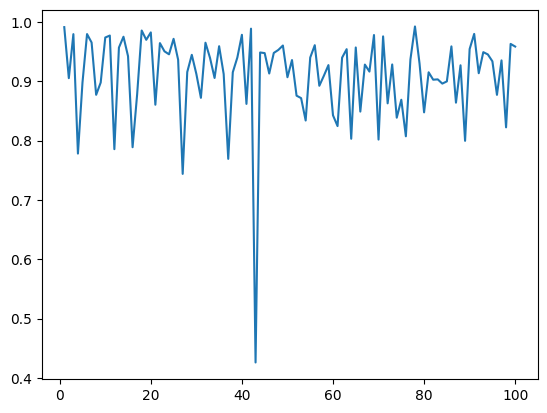

In [ ]:
time = []
accuracy = []
max_r2 = -1

for i in range(100):
  time.append(i+1)
  n_iter = random.randint(100,500)
  last_w , last_bias ,iter_list,val_r2,train_r2 ,X_test,Y_test= run_gradian_desent_algorithm(df,features,'Horsepower',n_iter)
  if(val_r2[-1] >= max_r2):
    max_r2 = val_r2[-1]
    best_w = last_w
    best_bias = last_bias
    best_n_iter = n_iter
  accuracy.append(val_r2[-1])
plt.plot(time, accuracy)
print(max_r2)

In [ ]:

X_train,Y_train,X_test,Y_test,X_val,Y_val = split_train_test_val(df,0.2,features,'Horsepower')
X_test,Y_test = standardize_df(X_test,Y_test)
predict_test = np.dot(X_test,best_w) + best_bias
print(f"r2_score for test is {get_r2_score(predict_test, Y_test)}")

r2_score for test is 0.995006513325923


# **Part 3**

In [ ]:
from sklearn.model_selection import train_test_split

class DataSplitter:
    def __init__(self, df, target_var, random_state=5):
        self.X = df.drop(target_var, axis=1)
        self.y = df[target_var]
        self.random_state = random_state

    def split(self, test_size=0.1, validation_size=0.1):
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y,
                                                            test_size=test_size + validation_size,
                                                            random_state=self.random_state)


        X_val, X_test, y_val, y_test = train_test_split(X_test, y_test,
                                                        test_size=test_size / (test_size + validation_size),
                                                        random_state=self.random_state)

        return {
            'X': {'train': X_train, 'val': X_val, 'test': X_test, 'cross_train': pd.concat([X_train, X_val])},
            'y': {'train': y_train, 'val': y_val, 'test': y_test, 'cross_train': pd.concat([y_train, y_val])}
            }

    def spilt_k_fold(self, test_size=0.1, k=5):
      train_test = self.split(test_size)
      X = train_test['X']['cross_train']
      y = train_test['y']['cross_train']

      splitted_data = {
            'X': {'test': train_test['X']['test']},
            'y': {'test': train_test['y']['test']}
            }


      fold_size = len(X) // k

      for fold in range(k):
          splitted_data['X'][fold] = dict()
          splitted_data['y'][fold] = dict()
          splitted_data['X'][fold]['train'] = pd.concat([X[:fold*fold_size], X[(fold+1)*fold_size:]])
          splitted_data['y'][fold]['train'] = pd.concat([y[:fold*fold_size], y[(fold+1)*fold_size:]])
          splitted_data['X'][fold]['val']   = X[fold*fold_size:(fold+1)*fold_size]
          splitted_data['y'][fold]['val']   = y[fold*fold_size:(fold+1)*fold_size]

      return splitted_data

    def get_random_state(self):
        return self.random_state

    def change_random_state(self):
        self.random_state += 1
        return self.random_state

In [ ]:
def update_weight_and_bias(learn_rate,gradian,bias_gradian,prev_weight,prev_bias):
  return prev_weight - learn_rate*gradian , prev_bias - learn_rate*bias_gradian

In [ ]:
def run_gradian_desent_algorithm(X_train,Y_train,X_test,Y_test,X_val,Y_val,n_iter):
  init_bias , init_weight = init_bias_and_weight(len(X_train.columns))
  X_train , Y_train = standardize_df(X_train,Y_train)
  X_test,Y_test = standardize_df(X_test,Y_test)
  X_val,Y_val = standardize_df(X_val,Y_val)
  iter_list = []
  val_r2_score = []
  train_r2_score = []
  for i in range(n_iter):
    iter_list.append(i+1)
    predict_train = np.dot(X_train,init_weight) + init_bias
    predict_val = np.dot(X_val,init_weight) + init_bias
    train_r2_score.append(get_r2_score(Y_train, predict_train))
    val_r2_score.append(get_r2_score(Y_val, predict_val))
    gradian = cal_gradian(Y_train,predict_train,X_train)
    bias_gradian = cal_bias_gradian(Y_train,predict_train)
    init_weight , init_bias = update_weight_and_bias(LEARNING_RATE,gradian,bias_gradian,init_weight,init_bias)
  return init_weight,init_bias,iter_list,val_r2_score, train_r2_score

In [ ]:
def K_fold_validation(df,target_name,n_iter,k=5):
  data_splitter = DataSplitter(df, target_name)
  splitted_data = data_splitter.spilt_k_fold(0.1,k)
  result = []

  for fold in range(k):
    result.append(run_gradian_desent_algorithm(
        splitted_data['X'][fold]['train'],
        splitted_data['y'][fold]['train'],
        splitted_data['X']['test'],
        splitted_data['y']['test'],
        splitted_data['X'][fold]['val']  ,
        splitted_data['y'][fold]['val']  ,
        100))

  return result

r2 score 0.8110393854197486


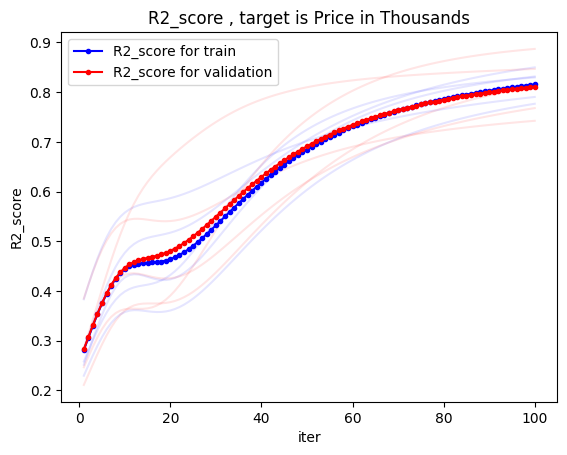

In [ ]:
out = K_fold_validation(df,'Price in Thousands',50,5)
print('r2 score Price in Thousands' ,np.mean([i[3][-1] for i in out]))
for i in range(len(out)):
  plt.plot(out[0][2], out[i][4], color='blue', alpha=0.1)
  plt.plot(out[0][2], out[i][3], color='red' , alpha=0.1)
train_avg = np.array(np.matrix([i[4] for i in out]).mean(0)).reshape(-1)
plt.plot(out[0][2], train_avg, color='blue',marker='.', linestyle='-', label=f'R2_score for train')
test_avg = np.array(np.matrix([i[3] for i in out]).mean(0)).reshape(-1)
plt.plot(out[0][2], test_avg, color='red' , marker='.', linestyle='-',label=f'R2_score for validation')
plt.xlabel("iter")
plt.ylabel('R2_score')
plt.title("R2_score , target is Price in Thousands")
plt.legend()
plt.show()

r2 score 0.8096404615324589


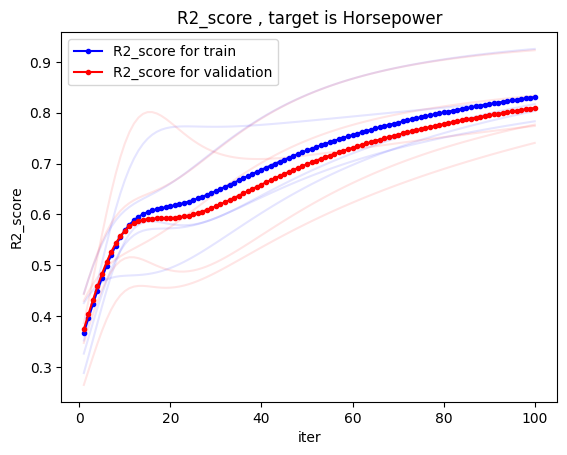

In [ ]:
out = K_fold_validation(df,'Horsepower',50,5)
print('r2 score Horsepower' ,np.mean([i[3][-1] for i in out]))
for i in range(len(out)):
  plt.plot(out[0][2], out[i][4], color='blue', alpha=0.1)
  plt.plot(out[0][2], out[i][3], color='red' , alpha=0.1)
train_avg = np.array(np.matrix([i[4] for i in out]).mean(0)).reshape(-1)
plt.plot(out[0][2], train_avg, color='blue',marker='.', linestyle='-', label=f'R2_score for train')
test_avg = np.array(np.matrix([i[3] for i in out]).mean(0)).reshape(-1)
plt.plot(out[0][2], test_avg, color='red' , marker='.', linestyle='-',label=f'R2_score for validation')
plt.xlabel("iter")
plt.ylabel('R2_score')
plt.title("R2_score , target is Horsepower")
plt.legend()
plt.show()

# **Part 4**

In [ ]:
X = df.drop(['Price in Thousands', 'Horsepower'], axis=1)
Y_h = df['Horsepower']
Y_p = df['Price in Thousands']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, Y_train_h, Y_test_h = train_test_split(X_scaled, Y_h, test_size=0.2, random_state=42)
X_train, X_test, Y_train_p, Y_test_p = train_test_split(X_scaled, Y_p, test_size=0.2, random_state=42)
model_h = LinearRegression()
model_p = LinearRegression()
model_h.fit(X_train, Y_train_h)
model_p.fit(X_train, Y_train_p)
h_predict = model_h.predict(X_test)
p_predict = model_p.predict(X_test)
r2 = r2_score(Y_test_h, h_predict)
print(f"r2_score for horsepower : {r2}")
r2 = r2_score(Y_test_p, p_predict)
print(f"r2_score for price in thousand : {r2}")

r2_score for horsepower : 0.9977010548714961
r2_score for price in thousand : 0.9176481216763152


In [ ]:
scores = cross_val_score(model_h, X_train, Y_train_h, cv=5, scoring='r2')
print(f"r2_score for horsepower : {scores.mean()}")
scores = cross_val_score(model_p, X_train, Y_train_p, cv=5, scoring='r2')
print(f"r2_score for price in thousand : {scores.mean()}")

r2_score for horsepower : 0.9966409331797654
r2_score for price in thousand : 0.8809753356022485


## **questions**

### **question 4**

Advantages:
- Use any data for both testing and training
- Hyperparameter tuning
- Avoid overfitting

Disadvantages:
- k to equalize the computational load

#### LOOCV
In this method, we perform training on the whole dataset but leaves only one data-point of the available dataset and then iterates for each data-point. In LOOCV, the model is trained on n-1    samples and tested on the one omitted sample, repeating this process for each data point in the dataset. It has some advantages as well as disadvantages also.

An advantage of using this method is that we make use of all data points and hence it is low bias.

The major drawback of this method is that it leads to higher variation in the testing model as we are testing against one data point. If the data point is an outlier it can lead to higher variation. Another drawback is it takes a lot of execution time as it iterates over ‘the number of data points’ times. [source](https://www.geeksforgeeks.org/cross-validation-machine-learning/)

#### Stratified K Fold Cross Validation
It is a technique used in machine learning to ensure that each fold of the cross-validation process maintains the same class distribution as the entire dataset. This is particularly important when dealing with imbalanced datasets, where certain classes may be underrepresented. In this method,

The dataset is divided into k folds while maintaining the proportion of classes in each fold.
During each iteration, one-fold is used for testing, and the remaining folds are used for training.
The process is repeated k times, with each fold serving as the test set exactly once.[source](https://www.geeksforgeeks.org/cross-validation-machine-learning/)

### **question 5**

We have criteria to evaluate the model

1. **RSS**: The disadvantage of this criterion is that the distance from the predicted value can be positive or negative and is not significant

2. **MSE**: The disadvantage of this measure is that its dimension is not the same as the distance dimension.

3. **RMSE**: The disadvantage of this criterion is that it can have different intervals in each problem and it is not suitable for comparison and reporting.

4. **R2score**: The good thing about this measure is that it is a number between zero and one, and it has the ability to compare and report, and the closer the number is to one, it means that the dependent variable is predicted by the independent variable.

**note** : But to calculate the gradient, the MSE gradient formula is simpler, so we used this criterion to update the parameters, but finally we used R2 score to show the learning curve and report the accuracy of the test data.
